# View files

Now that we have the raw images and the raw labels, we can start viewing each file to see whether they look correct or additional data is needed. To view these files, we will use napari and torchio and some other dependencies which we will load in below.

In [1]:
import napari
import torchio as tio
import os
from pathlib import Path

In [2]:
img_dir = '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/'
label_dir = '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/'

In [3]:
imgs = []
labels = []

for file in os.listdir(img_dir):
    if file.endswith('.nii'):
        imgs.append(img_dir + file)
        
for file in os.listdir(label_dir):
    if file.endswith('.nii'):
        labels.append(label_dir + file)

In [4]:
imgs[:5]

['//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/Paraphronima_head_05_FEG200130_102.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/Vibilia_FEG191112_081_blurrya.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/streetsia_20180409.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/Phronima_01_head_sp_5_USNM1450842.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/FEG191028_078_dcm.nii']

In [5]:
labels[:5]

['//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/Paraphronima_head_05_FEG200130_102.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/psyllid_20190906_female_eye.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/phronima_20180403.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/dampieri_20200218_male_left_1676.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/P_crassipes_FEG200129_099_highpriority.nii']

Let's find the imgs and labels with matching pairs and put the filename of these in a variable called `filenames`.

In [6]:
imgs_p = []
for img in imgs:
    imgs_p.append(Path(img).stem)
    
labels_p = []
for label in labels:
    labels_p.append(Path(label).stem)
    
filenames = sorted(list(set(imgs_p) & set(labels_p)))

Now let's loop through each filename and plot the data to see if it needs to be altered at all

In [7]:
i = 0

Load all of the subjects

In [8]:
subjects = []

for filename in filenames:
    subject = tio.Subject(
        image=tio.ScalarImage(img_dir + filename + '.nii'),
        label=tio.LabelMap(label_dir + filename + '.nii'),
        filename=filename
    )
    subjects.append(subject)

Now plot each subject

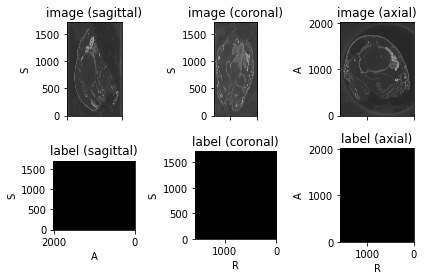

In [11]:
subjects[0].plot()

In [ ]:
i += 1

Let's double check that the affine matrices are the same

In [ ]:
img.affine

In [ ]:
lab.affine

Now let's do a plot to make sure everything looks ok

Now we can load this data quickly during training and testing. This can be done with the approach below.

In [ ]:
img = tio.ScalarImage(
    
)
ann = tio.LabelMap(
    'data/'+ id + '/' + id + '_label.nii.gz',
    affine=img.affine
)
subject = tio.Subject(
    mct=img,
    labels=ann,
    id=id
)
# subject.plot()

viewer = napari.Viewer()
viewer.dims.ndisplay = 3 # toggle 3 dimensional view
viewer.add_image(img.data.numpy())
viewer.add_image(ann.data.numpy())